# Dependencies / Modules

In [120]:
### TODO: remove unnecessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Grabing the data

In [2]:
# Athlete Events
df_athlete_events = pd.read_csv('../data/athlete_events.csv')

# NOC (National Olympic Comitee) Regions
df_noc_regions    = pd.read_csv('../data/noc_regions.csv')

# World Gross Domestic Product
df_world_gdp      = pd.read_csv('../data/world_gdp.csv')

# World Population
df_world_pop      = pd.read_csv('../data/world_pop.csv')

# World Cities
df_world_cities   = pd.read_csv('../data/worldcities.csv')

# GeoJSON
df_geo_json       = gpd.read_file('../data/countries.geojson')

# Look into the created data frames

## ~Athlete Events

In [3]:
# Athlete Events
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Only needed for prediction!

### Notice the following:
# 'Name' and 'ID' are NOT NEEDED for prediction
# Drop 'NOC' in favor of 'Team'
# Drop 'Games' as this information is already in 'Year' and 'Season'

#df_athlete_events = df_athlete_events.drop(columns=['Name', 'ID', 'Team', 'Games'])
#df_athlete_events.head()

In [5]:
df_athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## ~NOC (National Olympic Comitee) Regions

In [6]:
# NOC (National Olympic Comitee) Regions
df_noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
df_noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


## ~World Gross Domestic Product

In [8]:
# World Gross Domestic Product
df_world_gdp.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Last Updated Date,1/25/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1.965000e+03,...,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.0,548888896.0,546666678.0,751111191.0,800000044.0,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10


In [9]:
df_world_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Data Source                   221 non-null    object 
 1   World Development Indicators  221 non-null    object 
 2   Unnamed: 2                    220 non-null    object 
 3   Unnamed: 3                    220 non-null    object 
 4   Unnamed: 4                    103 non-null    float64
 5   Unnamed: 5                    103 non-null    float64
 6   Unnamed: 6                    105 non-null    float64
 7   Unnamed: 7                    105 non-null    float64
 8   Unnamed: 8                    105 non-null    float64
 9   Unnamed: 9                    114 non-null    float64
 10  Unnamed: 10                   115 non-null    float64
 11  Unnamed: 11                   118 non-null    float64
 12  Unnamed: 12                   120 non-null    float64
 13  Unnam

## ~World Population

In [10]:
# World Population
df_world_pop.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [11]:
df_world_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         217 non-null    object 
 1   Country Code    217 non-null    object 
 2   Indicator Name  217 non-null    object 
 3   Indicator Code  217 non-null    object 
 4   1960            214 non-null    float64
 5   1961            214 non-null    float64
 6   1962            214 non-null    float64
 7   1963            214 non-null    float64
 8   1964            214 non-null    float64
 9   1965            214 non-null    float64
 10  1966            214 non-null    float64
 11  1967            214 non-null    float64
 12  1968            214 non-null    float64
 13  1969            214 non-null    float64
 14  1970            214 non-null    float64
 15  1971            214 non-null    float64
 16  1972            214 non-null    float64
 17  1973            214 non-null    flo

## ~World Cities

In [12]:
# World Cities
df_world_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [13]:
df_world_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        42905 non-null  object 
 1   city_ascii  42905 non-null  object 
 2   lat         42905 non-null  float64
 3   lng         42905 non-null  float64
 4   country     42905 non-null  object 
 5   iso2        42873 non-null  object 
 6   iso3        42905 non-null  object 
 7   admin_name  42810 non-null  object 
 8   capital     9812 non-null   object 
 9   population  42180 non-null  float64
 10  id          42905 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ MB


## ~Geo JSON

In [14]:
# GeoJSON
df_geo_json.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [15]:
df_geo_json.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ADMIN     255 non-null    object  
 1   ISO_A3    255 non-null    object  
 2   geometry  255 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 6.1+ KB


In [16]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Clear the Data

In [17]:
##### Column 'Medal'
### Substitute the NaN's in the column 'Medal' with the string "NoMedalWon"
df_athlete_events.Medal = df_athlete_events.Medal.fillna('NoMedalWon')

In [18]:
##### Column 'Age'
### ~Convert 'Age' from Float64 to Int64
df_athlete_events['Age'] = df_athlete_events['Age'].astype('Int64')

# Substitute the NaN's with 99999 - if there are any NaN's
df_athlete_events.Age = df_athlete_events.Age.fillna(99999)


In [19]:
##### Column 'Height'
# ~Convert 'Height' from Float64 to Int64
df_athlete_events['Height'] = df_athlete_events['Height'].astype('Int64')

# Substitute the NaN's with 99999 if there are any NaN's
df_athlete_events.Height = df_athlete_events.Height.fillna(99999)
df_athlete_events.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedalWon
1,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedalWon
2,3,Gunnar Nielsen Aaby,M,24,99999,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedalWon
3,4,Edgar Lindenau Aabye,M,34,99999,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedalWon


# Create more data frames containing necessary and/or needed and/or important data

## ~Participants which won a medal

In [20]:
# Create data frame containing data about participants which actually have won a medal
df_medal_won = df_athlete_events[~df_athlete_events['Medal'].isnull()]
df_medal_won.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedalWon
1,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedalWon
2,3,Gunnar Nielsen Aaby,M,24,99999,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedalWon
3,4,Edgar Lindenau Aabye,M,34,99999,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedalWon


## ~Participants which have not won a medal

In [21]:
# Create data frame containing data about participants which actually have not won a medal
df_medal_not_won = df_athlete_events[df_athlete_events['Medal'].isnull()]
df_medal_not_won

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


### Clear the Data

In [22]:
### Substitute the NaN's which the string "NoMedalWon"
#df_medal_not_won = df_medal_not_won.fillna('NoMedalWon')
#df_medal_not_won.head()

### Clear the data for column 'Age'

In [23]:
### ~Convert 'Age' from Float64 to Int64
#df_athlete_events['Age'] = df_athlete_events['Age'].astype('Int64')
#df_athlete_events.head()

## ~The youngest participant(s) ever

### ~Participants Age

In [24]:
# Create data frame containing data about the youngest participant ever
#df_youngest_participant = df_athlete_events['Age'].min()
#df_youngest_participant # Show the age of the youngest participant
df_athlete_events['Age'].min()

10

### ~Overview for data for that age. How many participants are there with that age?

In [25]:
df_youngest_participant = (df_athlete_events ['Age'] == 10)
df_youngest_participant = df_athlete_events[df_youngest_participant]
df_youngest_participant

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10,99999,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


## ~The oldest participant(s) ever

In [26]:
# Create data frame containing data about the oldest participant ever
#df_oldest_participant = df_athlete_events['Age'].max()
#df_oldest_participant # Show the age of the youngest participant
df_athlete_events['Age'].max()

99999

### ~Overview for data for that age. How many participants are there with that age?

In [27]:
df_oldest_participant = (df_athlete_events ['Age'] == 97)
df_oldest_participant = df_athlete_events[df_oldest_participant]
df_oldest_participant

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97,99999,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NoMedalWon


## Men vs Women

In [39]:
# Show how many Men vs Women participated in the Olympics
#dummy = df_athlete_events.groupby(by="Sex").value_counts()
men_vs_woman = df_athlete_events['Sex'].value_counts().reset_index()
men_vs_woman # It should be 271116 participants in sum

,index,Sex
0,M,196594
1,F,74522


In [ ]:
# Show how many Men vs Women participated in the Olympics
#dummy = df_athlete_events.groupby(by="Sex").value_counts()
men_vs_woman = df_athlete_events['Sex'].value_counts().reset_index()
men_vs_woman # It should be 271116 participants in sum

# Age per Medal

In [102]:
# Show how many Men vs Women participated in the Olympics
#dummy = df_athlete_events.groupby(by="Sex").value_counts()
#age_per_medal = df_athlete_events['Medal'].value_counts().reset_index()
#age_per_medal # It should be 271116 participants in sum

#age_per_medal = df_athlete_events.groupby(by="Age").count().reset_index()

df_age_per_medal = df_athlete_events.copy()
df_age_per_medal
df_age_per_medal = df_age_per_medal.drop(columns=['Name', 'Height', 'Weight', 'Games'])


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedalWon
1,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedalWon
2,3,Gunnar Nielsen Aaby,M,24,99999,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedalWon
3,4,Edgar Lindenau Aabye,M,34,99999,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedalWon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NoMedalWon
271112,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NoMedalWon
271113,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NoMedalWon
271114,135571,Tomasz Ireneusz ya,M,30,185,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NoMedalWon


In [100]:
df_medal_overview = df_athlete_events.groupby(by="Medal").count().reset_index()
print(df_medal_overview)
df_medal_overview

        Medal      ID    Name     Sex     Age  Height  Weight    Team     NOC  \
0      Bronze   13295   13295   13295   13295   13295   10227   13295   13295   
1        Gold   13372   13372   13372   13372   13372   10254   13372   13372   
2  NoMedalWon  231333  231333  231333  231333  231333  177785  231333  231333   
3      Silver   13116   13116   13116   13116   13116    9975   13116   13116   

    Games    Year  Season    City   Sport   Event  
0   13295   13295   13295   13295   13295   13295  
1   13372   13372   13372   13372   13372   13372  
2  231333  231333  231333  231333  231333  231333  
3   13116   13116   13116   13116   13116   13116  


,Medal,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,Bronze,13295,13295,13295,13295,13295,10227,13295,13295,13295,13295,13295,13295,13295,13295
1,Gold,13372,13372,13372,13372,13372,10254,13372,13372,13372,13372,13372,13372,13372,13372
2,NoMedalWon,231333,231333,231333,231333,231333,177785,231333,231333,231333,231333,231333,231333,231333,231333
3,Silver,13116,13116,13116,13116,13116,9975,13116,13116,13116,13116,13116,13116,13116,13116


# Medals per NOC

In [110]:
df_medals_per_noc = df_athlete_events.groupby(by="NOC").count().reset_index()
df_medals_per_noc

,NOC,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,126,126,126,126,126,61,126,126,126,126,126,126,126,126
1,AHO,79,79,79,79,79,51,79,79,79,79,79,79,79,79
2,ALB,70,70,70,70,70,61,70,70,70,70,70,70,70,70
3,ALG,551,551,551,551,551,489,551,551,551,551,551,551,551,551
4,AND,169,169,169,169,169,135,169,169,169,169,169,169,169,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,YEM,32,32,32,32,32,25,32,32,32,32,32,32,32,32
226,YMD,5,5,5,5,5,3,5,5,5,5,5,5,5,5
227,YUG,2583,2583,2583,2583,2583,1644,2583,2583,2583,2583,2583,2583,2583,2583
228,ZAM,183,183,183,183,183,139,183,183,183,183,183,183,183,183


# Plotting

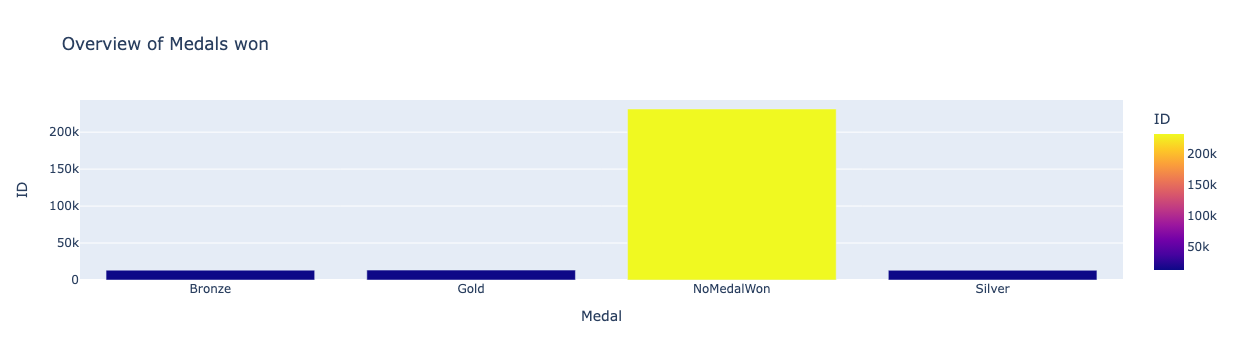

In [152]:
# Histogram Medals won
fig = px.bar(data_frame=df_medal_overview, x='Medal', y='ID', color="ID", title="Overview of Medals won")
fig.show()

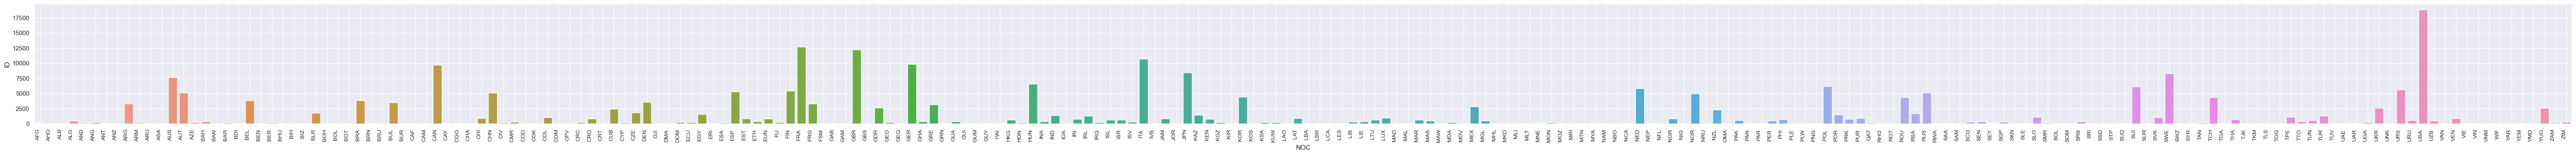

In [127]:
# Lineplot Medals won
plt.figure(figsize=(64,4)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.barplot(x="NOC", y="ID", data=df_medals_per_noc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)

#plt.legend(title='Overview of Medals won per NOC', loc='upper left', labels=['Amount of Medals'])
plt.tight_layout()
plt.grid(axis='x')

plt.show()


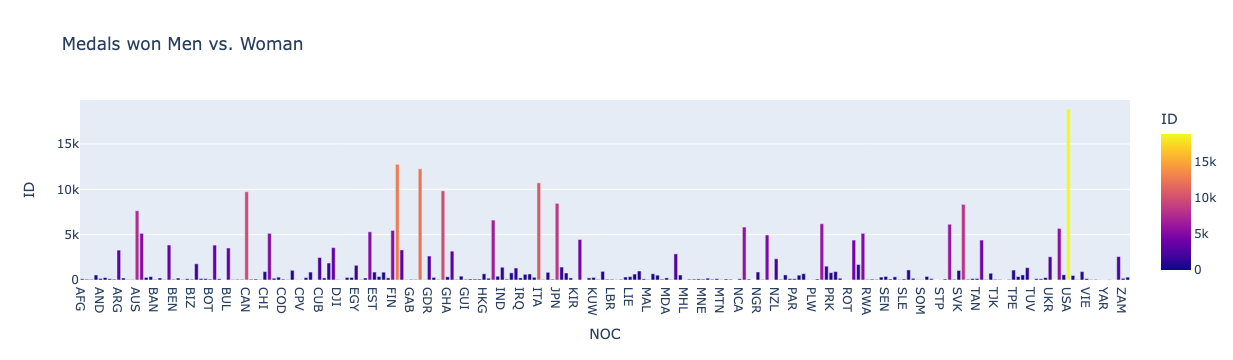

In [151]:
# Lineplot Medals won per NOC
fig = px.bar(data_frame=df_medals_per_noc, x='NOC', y='ID', color="ID", title="Medals won per NOC")
fig.show()

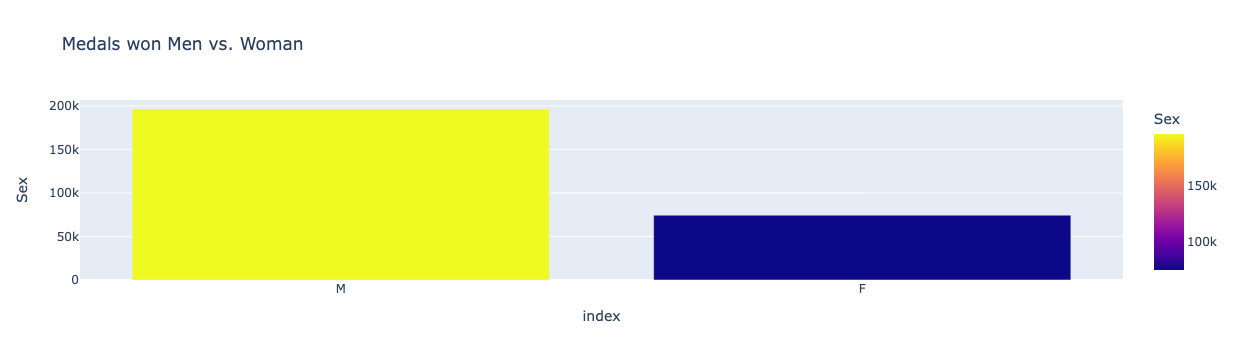

In [150]:
# Histogram Men vs Woman - Who won how many medals
#ax = sns.barplot(x="index", y="Sex", data=men_vs_woman)
#plt.show()
fig = px.bar(data_frame=men_vs_woman, x='index', y='Sex', color="Sex", title="Medals won Men vs. Woman")
fig.show()